In [1]:
import numpy as np


def get_cov(sdx=1., sdy=1., rotangdeg=0.):
    covar = np.array([[sdx, 0], [0, sdy]])
    rot_ang = rotangdeg / 360 * 2 * np.pi
    rot_mat = np.array([[np.cos(rot_ang), -np.sin(rot_ang)], [np.sin(rot_ang), np.cos(rot_ang)]])

    covar = np.matmul(np.matmul(rot_mat, covar), rot_mat.transpose())
    return covar


def gen_circular_distribution(n=500, scale=1):
    a = np.round(n / 7).astype('int')
    b = np.round(2*n / 7).astype('int')
    c = n - a - b
    r1 = np.concatenate(
        [np.random.normal(loc=2, scale=scale, size=[a, 1]), np.random.normal(loc=8, scale=scale, size=[c, 1])])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a+c, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a+c, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a+c, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a+c, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_simple_circular_distribution(n=100, scale=1):
    a = np.round(n/3).astype('int')
    b = n-a
    r1 = np.random.normal(loc=0, scale=scale, size=[a, 1])
    r2 = np.random.normal(loc=5, scale=scale, size=[b, 1])

    th1 = np.random.uniform(low=0, high=2 * np.pi, size=[a, 1])
    th2 = np.random.uniform(low=0, high=2 * np.pi, size=[b, 1])

    x1a = r1 * np.cos(th1)
    x2a = r1 * np.sin(th1)

    x1b = r2 * np.cos(th2)
    x2b = r2 * np.sin(th2)

    X = np.concatenate([np.concatenate([x1a.reshape([a, 1]), x1b.reshape([b, 1])]),
                        np.concatenate([x2a.reshape([a, 1]), x2b.reshape([b, 1])])], axis=1)

    y = np.concatenate([np.zeros([a, 1]), np.ones([b, 1])]).squeeze()
    return X, y


def gen_xor_distribution(n=100):
    a = np.round(n / 4).astype('int')
    b = n-a*3
    xc1 = np.concatenate([np.random.multivariate_normal([-2.3, -2.3], get_cov(0.4, 0.1, -45), a),
                          np.random.multivariate_normal([2.3, 2.3], get_cov(0.4, 0.1, -45), a)])
    xc2 = np.concatenate([np.random.multivariate_normal([-2.3, 2.3], get_cov(0.4, 0.1, 45), a),
                          np.random.multivariate_normal([2.3, -2.3], get_cov(0.4, 0.1, 45), b)])
    xc = np.array(np.concatenate([xc1, xc2]))

    y = np.array(np.concatenate([np.zeros([2 * a, 1]), np.ones([a+b, 1])])).squeeze()
    X = xc
    return X, y


Streaming output truncated to the last 5000 lines.
16/16 [==============================] - 0s 995us/step - loss: 0.6210 - accuracy: 0.7100
Epoch 2/2500
16/16 [==============================] - 0s 947us/step - loss: 0.5862 - accuracy: 0.7060
Epoch 3/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5779 - accuracy: 0.7080
Epoch 4/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.7080
Epoch 5/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5725 - accuracy: 0.7080
Epoch 6/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5718 - accuracy: 0.7120
Epoch 7/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7120
Epoch 8/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7140
Epoch 9/2500
16/16 [==============================] - 0s 1ms/step - loss: 0.5658 - accuracy: 0.7120
Epoch 10/2500
16/16 [==============================] - 0s 

(-10.0, 10.0)

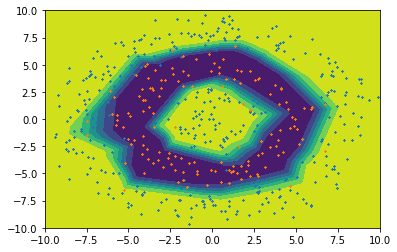

In [5]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.utils import *

import matplotlib.pyplot as plt

X,y = gen_circular_distribution(500)

model = Sequential()

model.add(Dense(units=6, activation='relu', input_dim=2)) 
model.add(Dense(units=6, activation='relu')) 
model.add(Dense(units=6, activation='relu')) 
model.add(Dense(units=2, activation='softmax')) 

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


y_binary = to_categorical(y)

model.fit(X, y_binary, epochs=2500, batch_size=32)

def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line
lim = 10
Xgrid,x1line,x2line = gen_sample_grid(limit=lim)

out_values = model.predict(Xgrid)

out_grid = np.reshape(out_values[:, 0], [200, 200])

fig, ax = plt.subplots()
plt.contourf(x1line,x2line,out_grid)

ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', s=2)
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', s=2)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
